In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import json
import statistics

In [ ]:
word9_RF = pd.read_csv('metrics.csv')

In [3]:
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
for metric in metrics:
    print(f'W9-RF {metric}: {word9_RF[metric].mean():.4f} ({word9_RF[metric].std():.4f})')
print('-------------------')
# for metric in metrics:
#     print(f'W9-SVM {metric}: {word9_SVM[metric].mean():.4f} ({word9_SVM[metric].std():.4f})')
# print('-------------------')
# for metric in metrics:
#     print(f'W15-RF {metric}: {word15_RF[metric].mean():.4f} ({word15_RF[metric].std():.4f})')
# print('-------------------')
# for metric in metrics:
#     print(f'W15-SVM {metric}: {word15_SVM[metric].mean():.4f} ({word15_SVM[metric].std():.4f})')


W9-RF precision: 0.9940 (0.0108)
W9-RF recall: 0.9998 (0.0001)
W9-RF f1_score: 0.9965 (0.0066)
W9-RF accuracy: 0.9999 (0.0000)
-------------------


(0.4, 1.0)

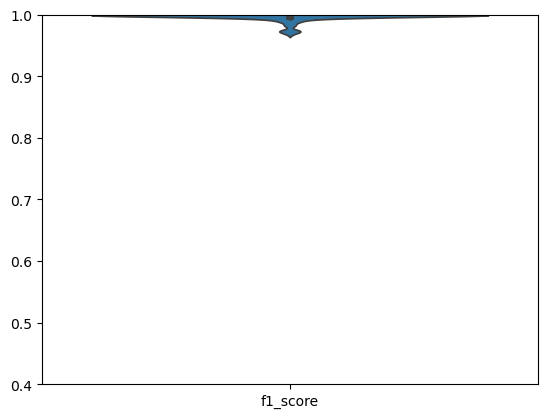

In [5]:
ax = sns.violinplot(data=[word9_RF['f1_score']])
ax.set_ylim([0.4,1])

(0.5, 1.0)

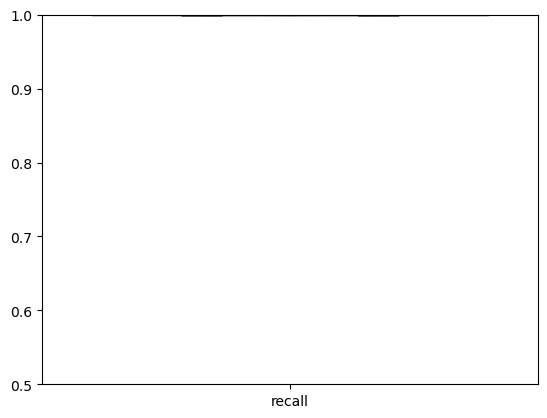

In [6]:
ax = sns.violinplot(data=[word9_RF['recall']])
ax.set_ylim([0.5,1])

(0.4, 1.0)

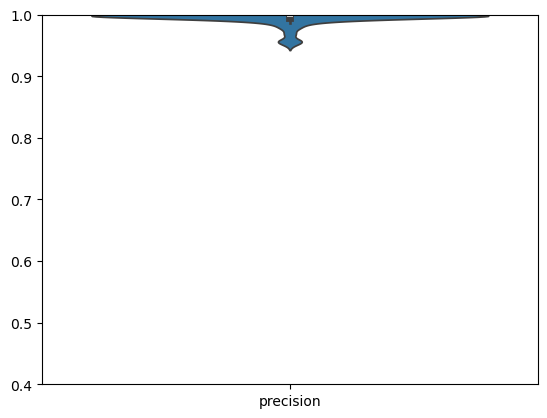

In [7]:
ax = sns.violinplot(data=[word9_RF['precision']])
ax.set_ylim([0.4,1])

In [8]:
def computeConfusionMatrix(tool, n):
    print("Compute confusion matrices for " + tool + "_" + str(n) + "...")

    matrices = {}
    df = pd.read_csv(tool + "/" + "predict_data_" + str(n) + ".csv")
    
    y_pred = df["Predicted"].str.split('_').str[0]
    y_true = df["ID"].str.split('_').str[0]

    confusion_matrix_matrix_pred = confusion_matrix(y_true, y_pred, normalize="pred")

    matrices["confusion_matrix_matrix_pred"] = confusion_matrix_matrix_pred.tolist()

    with open(tool + "/confusion_matrix/" + tool + "_" + str(n) + "_confusion_matrix_matrix_pred.json", "w") as outfile: json.dump(matrices["confusion_matrix_matrix_pred"], outfile)

In [9]:
# file_names = ["word9_RF", "word9_SVM", "word15_RF", "word15_SVM"]
file_names = ["w9_rf_rust"]
for file in file_names:
    for n in range(1,101):
        computeConfusionMatrix(file, n)


Compute confusion matrices for w9_rf_rust_1...
Compute confusion matrices for w9_rf_rust_2...
Compute confusion matrices for w9_rf_rust_3...
Compute confusion matrices for w9_rf_rust_4...
Compute confusion matrices for w9_rf_rust_5...
Compute confusion matrices for w9_rf_rust_6...
Compute confusion matrices for w9_rf_rust_7...
Compute confusion matrices for w9_rf_rust_8...
Compute confusion matrices for w9_rf_rust_9...
Compute confusion matrices for w9_rf_rust_10...
Compute confusion matrices for w9_rf_rust_11...
Compute confusion matrices for w9_rf_rust_12...
Compute confusion matrices for w9_rf_rust_13...
Compute confusion matrices for w9_rf_rust_14...
Compute confusion matrices for w9_rf_rust_15...
Compute confusion matrices for w9_rf_rust_16...
Compute confusion matrices for w9_rf_rust_17...
Compute confusion matrices for w9_rf_rust_18...
Compute confusion matrices for w9_rf_rust_19...
Compute confusion matrices for w9_rf_rust_20...
Compute confusion matrices for w9_rf_rust_21...
C

In [16]:
word9_RF = []
word9_RF_mean = []
word9_RF_standard_deviation = []

for n in range(1, 101): 
    with open("w9_rf_rust/confusion_matrix/w9_rf_rust_" + str(n) + "_confusion_matrix_matrix_pred.json") as data: word9_RF.append(np.asarray(json.load(data)))

for i in range(0, 100):
    data = []
    for j in range(0, 100):
        data.append(word9_RF[j].flatten()[i]) 
    word9_RF_mean.append(round(statistics.mean(data) * 100, 2))
    word9_RF_standard_deviation.append(round(statistics.stdev(data)*100, 2))
word9_RF_mean = np.asarray(word9_RF_mean).reshape(10,10)
word9_RF_standard_deviation = np.asarray(word9_RF_standard_deviation).reshape(10,10)

word9_RF_combined = [f"{i}\n± {j}" for i, j in zip(word9_RF_mean.flatten(), word9_RF_standard_deviation.flatten())]
word9_RF_combined = np.asarray(word9_RF_combined).reshape(10,10)

In [17]:
word9_SVM = []
word9_SVM_mean = []
word9_SVM_standard_deviation = []

for n in range(1, 101): 
    with open("word9_SVM/confusion_matrix/word9_SVM_" + str(n) + "_confusion_matrix_matrix_pred.json") as data: word9_SVM.append(np.asarray(json.load(data)))

for i in range(0, 100):
    data = []
    for j in range(0, 100):
        data.append(word9_SVM[j].flatten()[i]) 
    word9_SVM_mean.append(round(statistics.mean(data) * 100, 2))
    word9_SVM_standard_deviation.append(round(statistics.stdev(data)*100, 2))
word9_SVM_mean = np.asarray(word9_SVM_mean).reshape(10,10)
word9_SVM_standard_deviation = np.asarray(word9_SVM_standard_deviation).reshape(10,10)

word9_SVM_combined = [f"{i}\n({j})" for i, j in zip(word9_SVM_mean.flatten(), word9_SVM_standard_deviation.flatten())]
word9_SVM_combined = np.asarray(word9_SVM_combined).reshape(10,10)

In [ ]:
from math import sqrt
from operator import truediv
def get_metrics_from_conf_matrix(conf_mat):
    TP = np.diag(conf_mat)
    FP = conf_mat.sum(axis=0) - TP
    FN = conf_mat.sum(axis=1) - TP
    
    TN = conf_mat.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensibilidade, taxa de acerto, recall ou taxa de true positive 
    TPR = list(map(truediv,TP,(TP+FN)))
    m_TPR = np.mean(TPR)
    print("Sensibilidade Recall:\t", m_TPR)
    
    # Especificidade ou taxa de true negative
    TNR = TN/(TN+FP) 
    m_TNR = np.mean(TNR)
    print("True Negative:\t", m_TNR)
    
    # Precisao
    PPV = list(map(truediv,TP,(TP+FP)))
    m_PPV = np.mean(PPV)
    print("Precisão:\t", m_PPV)
    
    # Predicao negativa
    NPV = TN/(TN+FN)
    m_NPV = np.mean(NPV)
    print("Pred. Negativa:\t", m_NPV)
    # False positive
    FPR = FP/(FP+TN)
    m_FPR = np.mean(FPR)
    print("False Positive: ", m_FPR)
    # False negative
    FNR = FN/(TP+FN)
    m_FNR = np.mean(FNR)
    print("False Negative:\t", m_FNR)
    # False discovery
    FDR = FP/(TP+FP)
    m_FDR = np.mean(FDR)def compute_metrics(matrix):
    tp = np.diag(matrix)
    recall = tp / matrix.sum(axis=1)
    precision = tp / matrix.sum(axis=0)
    f1 = 2 * (precision * recall) / (precision + recall)
    return precision * 100, recall * 100, f1 * 100

In [15]:
KEVOLVE_MEAN = [[99.99, 0.08, 0.03, 0.01, 0.42, 0.03, 0.02, 0.27, 0.05, 0.0],
                [0.0, 99.45, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 0.02, 99.81, 0.0, 0.05, 0.0, 0.0, 4.78, 0.14, 0.0],
                [0.0, 0.08, 0.0, 99.95, 0.01, 0.0, 0.0, 0.12, 0.0, 0.0],
                [0.0, 0.02, 0.0, 0.0, 99.28, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 0.05, 0.0, 0.0, 0.0, 99.88, 0.0, 0.13, 0.03, 0.0],
                [0.0, 0.12, 0.0, 0.01, 0.01, 0.0, 99.98, 0.04, 0.11, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 92.08, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 96.57, 0.0],
                [0.0, 0.19, 0.16, 0.02, 0.23, 0.09, 0.0, 2.57, 3.1, 99.99]]
KEVOLVE_MEAN = np.asarray(KEVOLVE_MEAN)
KEVOLVE_SD = [[0.01, 0.22, 0.06, 0.02, 1.65, 0.03, 0.02, 1.01, 0.2, 0.0],
              [0.0, 1.36, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.08, 0.11, 0.01, 0.15, 0.1, 0.0, 8.77, 0.52, 0.01],
              [0.0, 0.29, 0.01, 0.07, 0.08, 0.0, 0.01, 0.66, 0.0, 0.0],
              [0.0, 0.06, 0.0, 0.0, 2.11, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.18, 0.01, 0.0, 0.04, 0.19, 0.0, 0.78, 0.14, 0.0],
              [0.0, 0.32, 0.0, 0.02, 0.05, 0.0, 0.03, 0.29, 0.41, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.92, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.9, 0.0],
              [0.01, 1.01, 0.1, 0.05, 0.84, 0.18, 0.02, 8.24, 6.83, 0.01]]
KEVOLVE_SD = np.asarray(KEVOLVE_SD)
KEVOLVE_combined = [f"{i}\n({j})" for i, j in zip(KEVOLVE_MEAN.flatten(), KEVOLVE_SD.flatten())]
KEVOLVE_combined = np.asarray(KEVOLVE_combined).reshape(10,10)

In [8]:
STREME_MEAN = [[100.0, 1.41, 0.1, 0.02, 0.05, 0.01, 0.03, 1.151, 3.23, 0.0],
               [0.0, 88.66, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.0],
               [0.0, 1.53, 99.52, 0.04, 0.11, 0.0, 0.02, 5.6, 2.58, 0.0],
               [0.0, 3.96, 0.06, 99.85, 0.32, 0.0, 0.02, 0.8, 2.99, 0.0],
               [0.0, 0.04, 0.0,  0.0, 98.66,  0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.51, 0.01, 0.0, 0.04, 99.99,  0.0, 0.0, 0.35, 0.0],
               [0.0, 1.46, 0.07, 0.04, 0.78, 0.0, 99.92, 0.79, 1.9, 0.0],
               [0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 91.18, 0.01, 0.0],
               [0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 84.99, 0.0],
               [0.0, 2.4, 0.23, 0.04, 0.05,  0.0, 0.02, 0.12, 3.83, 100.0]]
STREME_MEAN = np.asarray(STREME_MEAN)
STREME_SD = [[0.01, 4.04, 0.32, 0.07, 0.31, 0.01, 0.08, 10.67, 10.9, 0.0],
             [0.0, 11.91, 0.01, 0.01, 0.03, 0.0, 0.0, 0.0, 0.24, 0.0],
             [0.0, 2.6, 0.56, 0.11, 0.63, 0.01, 0.05, 11.97, 4.5, 0.0],
             [0.0, 7.25, 0.1, 0.34, 1.07, 0.0, 0.05, 6.02, 5.28, 0.0],
             [0.0, 0.12, 0.0, 0.0, 4.26,  0.0, 0.0, 0.0, 0.04, 0.0],
             [0.0, 1.86, 0.03, 0.01, 0.16, 0.04, 0.0, 0.0, 0.79, 0.0],
             [0.0, 2.58, 0.19, 0.2, 3.96, 0.01, 0.15, 3.66, 4.28, 0.0],
             [0.0, 0.04,  0.0, 0.0, 0.0, 0.0, 0.0, 17.79, 0.05, 0.0],
             [0.0, 0.05,  0.0, 0.0, 0.02,  0.0, 0.0, 0.0, 20.08, 0.0],
             [0.0, 2.98, 0.23, 0.12, 0.27, 0.01, 0.05, 0.76, 5.78, 0.0]]
STREME_SD = np.asarray(STREME_SD)
STREME_combined = [f"{i}\n({j})" for i, j in zip(STREME_MEAN.flatten(), STREME_SD.flatten())]
STREME_combined = np.asarray(STREME_combined).reshape(10,10)

In [9]:
CASTOR_KRFE_MEAN = [[99.96, 12.41, 1.79, 0.39, 16.88, 1.72, 0.52, 18.74, 3.33, 0.09],
                    [0.0, 78.92,  0.0, 0.0, 0.07, 0.01,  0.0, 0.0, 0.02, 0.0],
                    [0.01, 0.11, 97.27, 0.09, 1.46, 0.04, 0.01, 16.77, 0.88, 0.01],
                    [0.0, 2.69, 0.16, 99.31, 0.4, 0.12, 0.07, 11.32, 0.74, 0.0],
                    [0.0, 0.02,  0.0, 0.0, 79.74,  0.0, 0.0, 0.02,  0.0, 0.0],
                    [0.01, 1.38, 0.03, 0.03, 0.28, 97.31,0.04, 0.46, 0.31, 0.0],
                    [0.0, 2.43, 0.02, 0.07, 0.64, 0.13, 99.31, 0.35, 2.37, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 49.04, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 63.52, 0.0],
                    [0.02, 2.03, 0.73, 0.11, 0.53, 0.66, 0.05, 3.29, 28.82, 99.9]]
CASTOR_KRFE_MEAN = np.asarray(CASTOR_KRFE_MEAN)
CASTOR_KRFE_SD = [[0.04, 18.54, 2.79, 1.19, 21.87, 2.54, 0.88, 30.51, 10.19, 0.2],
                  [0.0, 21.23, 0.0, 0.01, 0.14, 0.01, 0.01, 0.02, 0.09, 0.0],
                  [0.01, 0.39, 3.09, 0.16, 2.09, 0.08, 0.05, 21.11, 2.03, 0.01],
                  [0.0, 3.4,0.29, 1.49, 1.25, 0.24, 0.1, 13.78, 2.43, 0.0],
                  [0.0, 0.11, 0.01, 0.0, 21.99, 0.01, 0.0, 0.13, 0.04, 0.0],
                  [0.01, 2.67, 0.09, 0.07, 0.72, 2.73, 0.08, 1.8, 1.05, 0.01],
                  [0.0, 5.47, 0.08, 0.12, 1.95, 0.29, 1.0, 1.72, 4.35, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 0.03,  0.0, 0.0, 32.25, 0.0, 0.0],
                  [0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.48, 0.0],
                  [0.04, 7.29, 0.97, 0.29, 1.96, 0.7, 0.12, 10.13, 24.3, 0.2]]
CASTOR_KRFE_SD = np.asarray(CASTOR_KRFE_SD)
CASTOR_KRFE_combined = [f"{i}\n({j})" for i, j in zip(CASTOR_KRFE_MEAN.flatten(), CASTOR_KRFE_SD.flatten())]
CASTOR_KRFE_combined = np.asarray(CASTOR_KRFE_combined).reshape(10,10)

In [10]:
MEME_OOPS_MEAN = [[99.77, 4.07, 1.61, 1.68, 0.03, 0.09, 0.06, 1.85, 7.25, 0.0],
                  [0.0, 67.06, 0.07, 0.07,  0.0, 0.0, 0.07, 0.18, 0.27, 0.0],
                  [0.08, 4.77, 92.16, 2.13, 0.46, 0.02, 0.05, 18.21, 12.47, 0.01],
                  [0.13, 10.07, 4.08, 94.3, 0.76, 0.09, 0.46, 2.7, 23.95, 0.0],
                  [0.0, 0.01, 0.0, 0.01, 98.53, 0.0, 0.0, 0.0, 0.02, 0.0],
                  [0.0, 0.19, 0.04, 0.11, 0.06, 99.77, 0.0, 0.05, 0.49, 0.0],
                  [0.0, 11.68, 0.86, 0.67, 0.11, 0.01, 99.32, 0.0, 3.07, 0.0],
                  [0.0, 0.0, 0.02,  0.0, 0.0, 0.0, 0.0, 76.08, 0.0, 0.0],
                  [0.0, 0.22, 0.08, 0.1, 0.0, 0.0, 0.01, 0.0, 47.17, 0.0],
                  [0.0, 1.93, 1.08, 0.93, 0.04, 0.01, 0.03, 0.92, 5.31, 99.99]]
MEME_OOPS_MEAN = np.asarray(MEME_OOPS_MEAN)
MEME_OOPS_SD = [[1.53, 14.53, 8.06, 7.64, 0.21, 0.32, 0.27, 10.53, 17.33, 0.0],
                [0.02, 29.34, 0.35, 0.34, 0.0, 0.0, 0.34, 1.16, 1.57, 0.0],
                [0.58, 13.15, 17.02, 6.47, 1.78, 0.08, 0.16, 30.05, 20.44, 0.01],
                [0.92, 17.23, 12.45, 11.61, 2.2, 0.29, 4.17, 8.59, 34.46, 0.01],
                [0.0, 0.07, 0.01, 0.01, 3.97, 0.0, 0.0, 0.02, 0.07, 0.0],
                [0.0, 0.52, 0.14, 0.31, 0.58, 0.51, 0.02, 0.3, 1.52, 0.0],
                [0.01, 21.81, 5.12, 4.0, 1.12, 0.04, 4.29, 0.0, 12.81, 0.0],
                [0.0, 0.01, 0.07, 0.01, 0.0, 0.0, 0.0, 32.63, 0.02, 0.0],
                [0.01, 1.1, 0.27, 0.27, 0.0, 0.0, 0.09, 0.0, 42.14, 0.0],
                [0.02, 5.77, 1.69, 2.37, 0.25, 0.05, 0.11, 5.03, 11.1, 0.02]]
MEME_OOPS_SD = np.asarray(MEME_OOPS_SD)
MEME_OOPS_combined = [f"{i}\n({j})" for i, j in zip(MEME_OOPS_MEAN.flatten(), MEME_OOPS_SD.flatten())]
MEME_OOPS_combined = np.asarray(MEME_OOPS_combined).reshape(10,10)

In [5]:
MEME_ZOOPS_MEAN = [[99.68, 6.27, 0.18, 3.65, 1.75, 0.11, 1.0, 9.32, 6.39, 0.0],
                   [0.01, 43.52, 0.03, 0.58, 0.0, 0.0, 0.04, 1.06, 2.68, 0.0],
                   [0.0, 9.94, 97.48, 1.95, 0.77, 0.01, 0.24, 12.73, 6.04, 0.0],
                   [0.21, 25.95, 0.75, 89.16, 2.48, 0.3, 2.08, 5.94, 33.82, 0.0],
                   [0.0, 0.03, 0.01, 0.02, 94.23, 0.0, 0.0, 0.2, 0.09, 0.0],
                   [0.0, 1.2, 0.03, 0.58, 0.02, 99.56, 0.02, 1.07, 0.64, 0.0],
                   [0.09, 6.17, 0.26, 2.91, 0.56, 0.01, 96.53, 1.17, 4.37, 0.0],
                   [0.0, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 67.47, 0.02, 0.0],
                   [0.0, 1.12, 0.01, 0.16, 0.02, 0.0, 0.03, 0.02, 42.25, 0.0],
                   [0.0, 5.76, 1.24, 0.99, 0.19, 0.01, 0.06, 1.01, 3.69, 99.99]]
MEME_ZOOPS_MEAN = np.asarray(MEME_ZOOPS_MEAN)
MEME_ZOOPS_SD = [[1.94, 14.77, 0.7, 12.18, 9.35, 0.29, 7.98, 20.32, 18.07, 0.01],
                 [0.03, 34.43, 0.13, 0.92, 0.01, 0.0, 0.2, 3.63, 7.37, 0.0],
                 [0.01, 16.24, 7.33, 5.98, 1.75, 0.01, 2.0, 22.57, 15.38, 0.01],
                 [1.19, 26.83, 3.51, 17.07, 9.55, 0.54, 7.89, 13.9, 38.47, 0.01],
                 [0.02, 0.08, 0.08, 0.07, 1503, 0.0, 0.03, 1.83, 0.36, 0.0],
                 [0.0, 2.83, 0.14, 1.47, 0.09, 0.68, 0.07, 5.56, 2.42, 0.0],
                 [0.91, 17.03, 2.28, 9.84, 2.26, 0.06, 12.59, 5.26, 13.96, 0.0],
                 [0.0, 0.25, 0.07, 0.01, 0.0, 0.0, 0.0, 33.46, 0.13, 0.0],
                 [0.02, 3.39, 0.03, 0.35, 0.12, 0.0, 0.13, 0.24, 43.19, 0.0],
                 [0.02, 8.82, 3.5, 1.92, 1.1, 0.04, 0.23, 2.49, 10.36, 0.02]]
MEME_ZOOPS_SD = np.asarray(MEME_ZOOPS_SD)
MEME_ZOOPS_combined = [f"{i}\n({j})" for i, j in zip(MEME_ZOOPS_MEAN.flatten(), MEME_ZOOPS_SD.flatten())]
MEME_ZOOPS_combined = np.asarray(MEME_ZOOPS_combined).reshape(10,10)

In [16]:
mu = KEVOLVE_MEAN
sigma = KEVOLVE_SD

n = mu.shape[0]

# Variância das células
var = sigma**2
row_sums = mu.sum(axis=1)
col_sums = mu.sum(axis=0)

# Per-class metrics mean
p = np.diag(mu) / col_sums
r = np.diag(mu) / row_sums
f1 = 2 * p * r / (p + r)

# Functions for variances
def var_recall(i):
    mu_ii = mu[i,i]; sr = row_sums[i]
    d_ii = (sr - mu_ii) / sr**2
    d_ij = -mu_ii / sr**2
    return d_ii**2 * var[i,i] + np.sum([d_ij**2 * var[i,j] for j in range(n) if j!=i])

def var_precision(i):
    mu_ii = mu[i,i]; sc = col_sums[i]
    d_ii = (sc - mu_ii) / sc**2
    d_ki = -mu_ii / sc**2
    return d_ii**2 * var[i,i] + np.sum([d_ki**2 * var[k,i] for k in range(n) if k!=i])

def var_f1(i, vp, vr):
    dFp = 2*r[i]**2/(p[i]+r[i])**2
    dFr = 2*p[i]**2/(p[i]+r[i])**2
    return dFp**2 * vp + dFr**2 * vr

# Per-class variances
vp = np.array([var_precision(i) for i in range(n)])
vr = np.array([var_recall(i) for i in range(n)])
vf1 = np.array([var_f1(i, vp[i], vr[i]) for i in range(n)])

# Macro averages and std
macro_p = p.mean()
macro_r = r.mean()
macro_f1 = f1.mean()

macro_p_std = np.sqrt(vp.sum())/n * 100
macro_r_std = np.sqrt(vr.sum())/n * 100
macro_f1_std = np.sqrt(vf1.sum())/n * 100

# DataFrame output
df_macro = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1 Score"],
    "Mean (%)": [macro_p*100, macro_r*100, macro_f1*100],
    "Std (%)": [macro_p_std, macro_r_std, macro_f1_std]
}).set_index("Metric")
df_macro

,Mean (%),Std (%)
Metric,,
Precision,98.700926,1.320897
Recall,98.762758,1.264603
F1 Score,98.697553,0.971645


[Text(0, 0.5, 'Alpha'),
 Text(0, 1.5, 'Beta'),
 Text(0, 2.5, 'Delta'),
 Text(0, 3.5, 'Epsilon'),
 Text(0, 4.5, 'Eta'),
 Text(0, 5.5, 'Gamma'),
 Text(0, 6.5, 'Iota'),
 Text(0, 7.5, 'Kappa'),
 Text(0, 8.5, 'Lambda'),
 Text(0, 9.5, 'Omicron')]

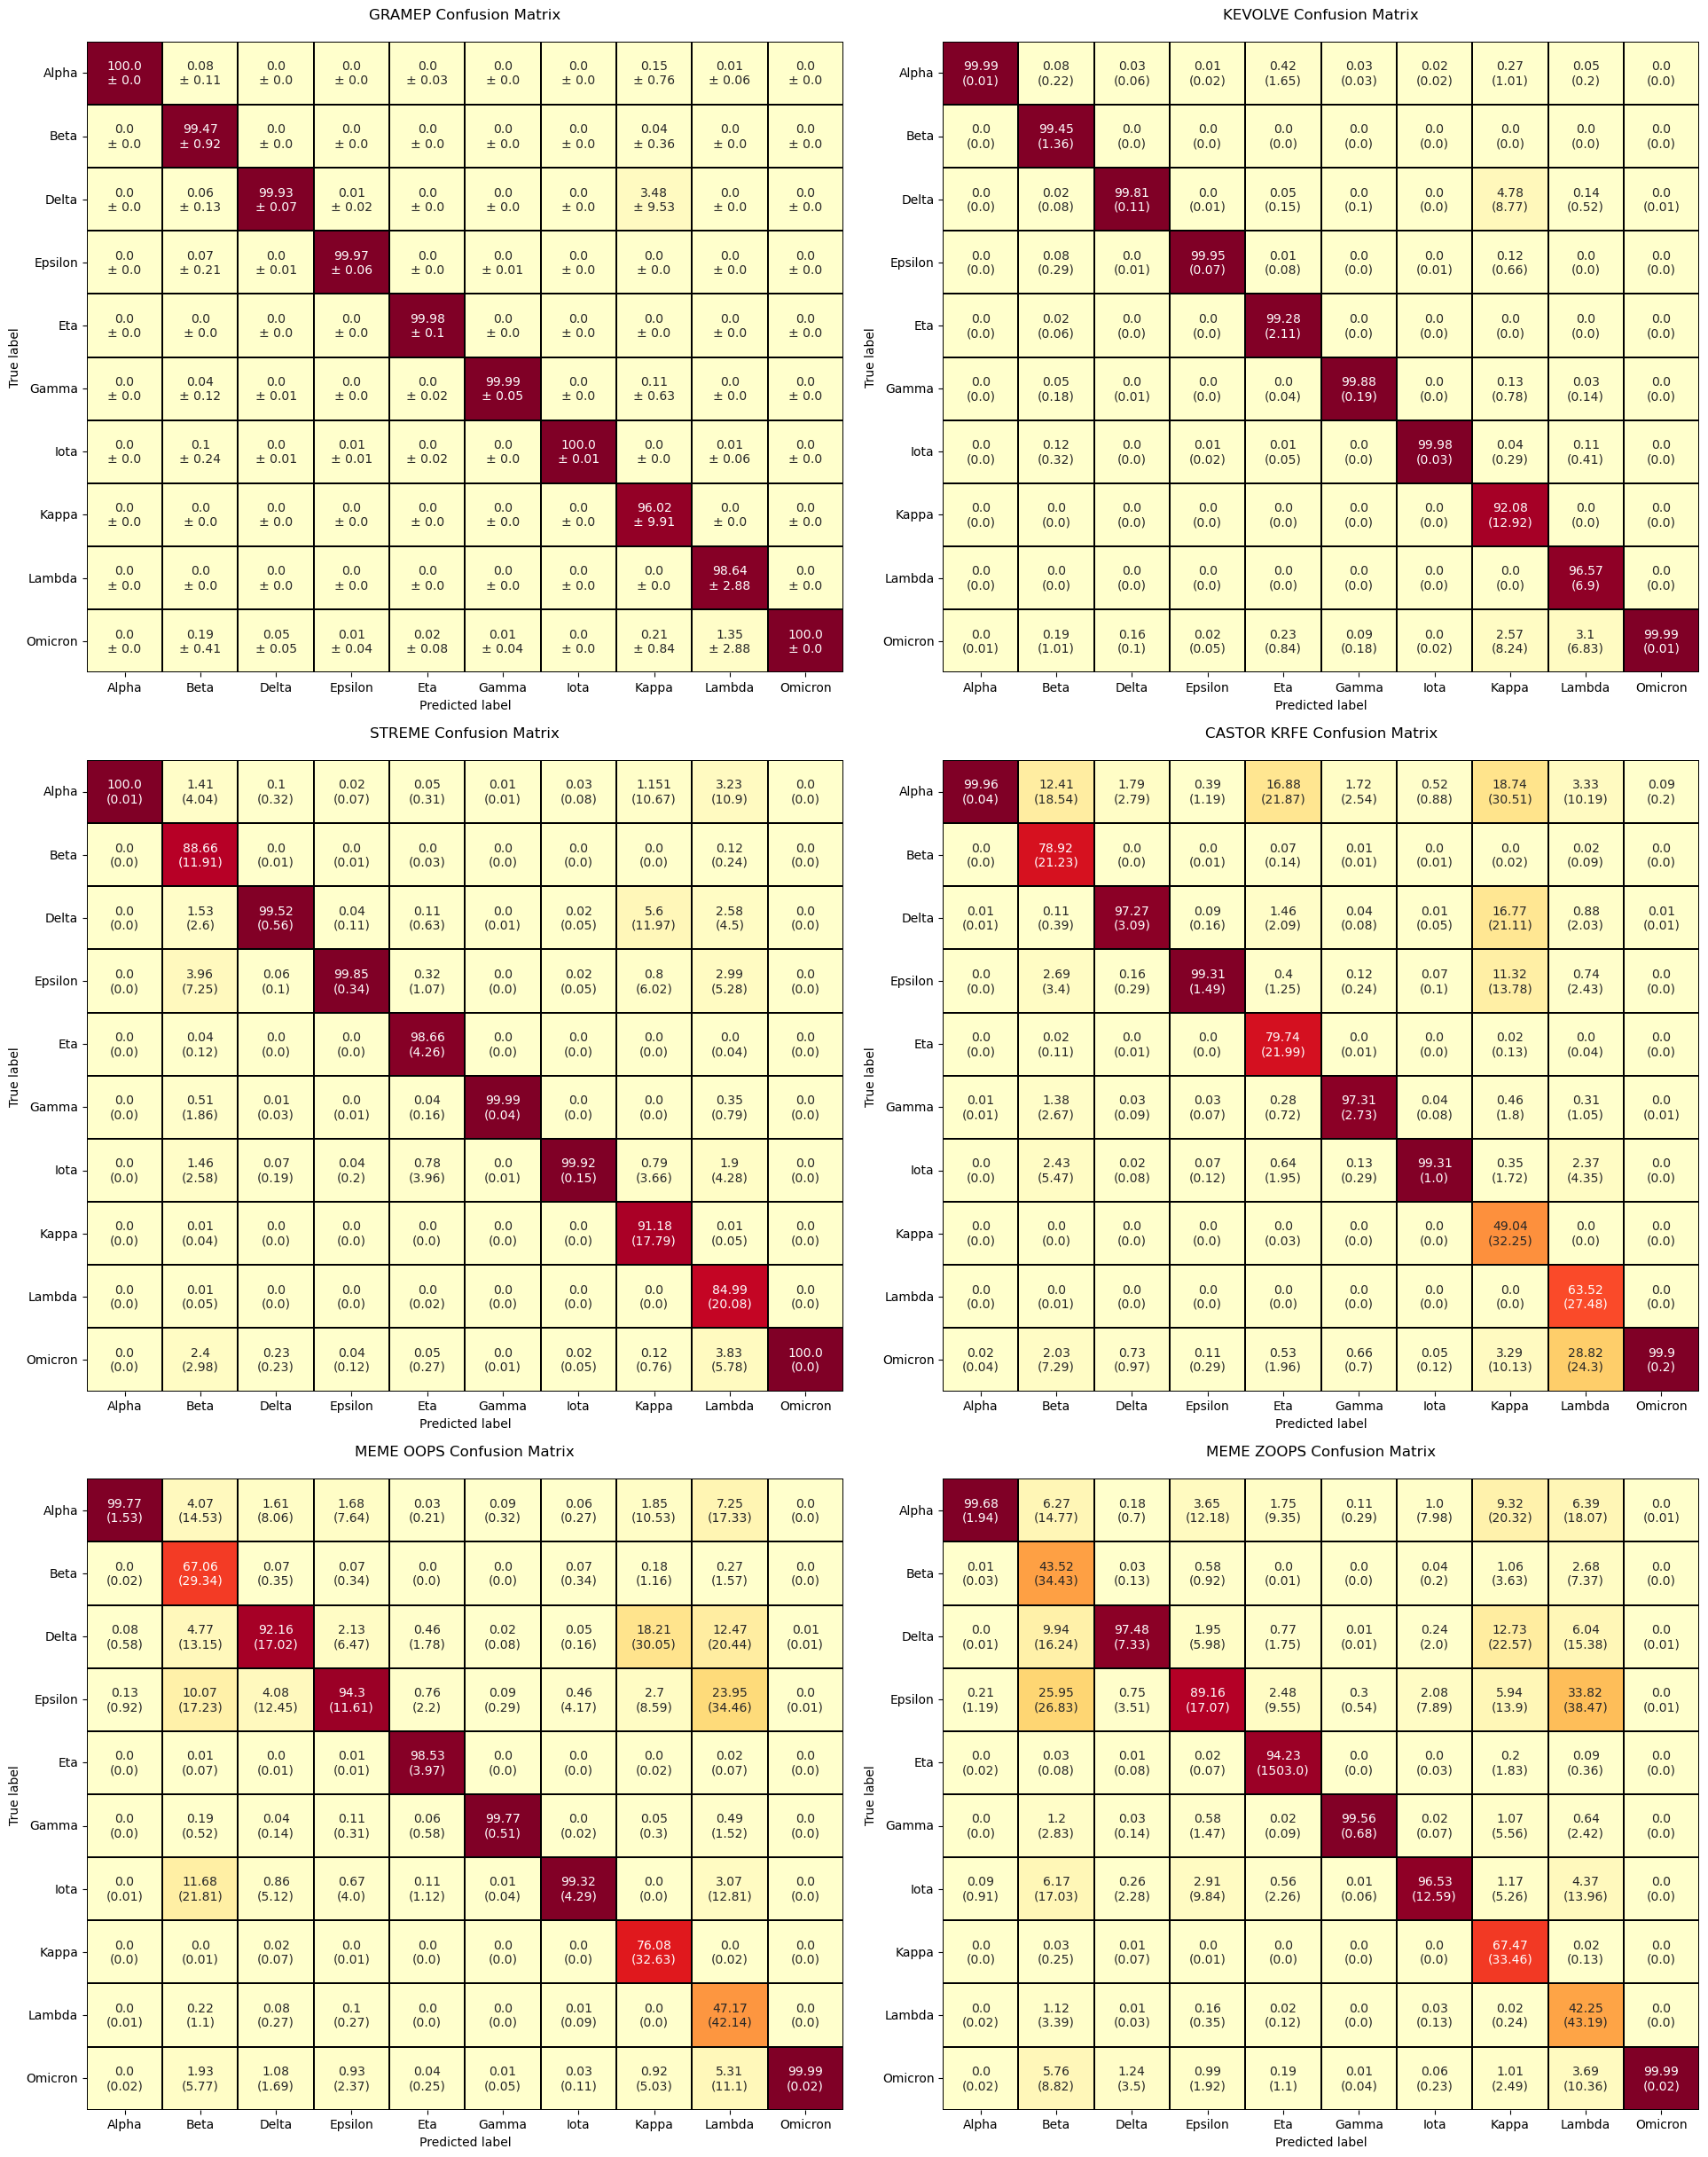

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(20,25))
fig.tight_layout(pad=5.0)

classes = ["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"]

sns.heatmap(ax=axes[0][0], data=word9_RF_mean,
            annot=word9_RF_combined,
            fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)
sns.heatmap(ax=axes[0][1], data=KEVOLVE_MEAN, annot=KEVOLVE_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)
sns.heatmap(ax=axes[1][0], data=STREME_MEAN, annot=STREME_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)
sns.heatmap(ax=axes[1][1], data=CASTOR_KRFE_MEAN, annot=CASTOR_KRFE_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)
sns.heatmap(ax=axes[2][0], data=MEME_OOPS_MEAN, annot=MEME_OOPS_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)
sns.heatmap(ax=axes[2][1], data=MEME_ZOOPS_MEAN, annot=MEME_ZOOPS_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)

# Titles
axes[0][0].set_title("GRAMEP Confusion Matrix\n")
axes[0][1].set_title("KEVOLVE Confusion Matrix\n")
axes[1][0].set_title("STREME Confusion Matrix\n")
axes[1][1].set_title("CASTOR KRFE Confusion Matrix\n")
axes[2][0].set_title("MEME OOPS Confusion Matrix\n")
axes[2][1].set_title("MEME ZOOPS Confusion Matrix\n")

# X ticks labels
axes[0][0].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])
axes[0][1].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])
axes[1][0].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])
axes[1][1].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])
axes[2][0].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])
axes[2][1].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])

# X and Y Labels
axes[0][0].set_ylabel("True label")
axes[0][0].set_xlabel("Predicted label")
axes[0][1].set_ylabel("True label")
axes[0][1].set_xlabel("Predicted label")
axes[1][0].set_ylabel("True label")
axes[1][0].set_xlabel("Predicted label")
axes[1][1].set_ylabel("True label")
axes[1][1].set_xlabel("Predicted label")
axes[2][0].set_ylabel("True label")
axes[2][0].set_xlabel("Predicted label")
axes[2][1].set_ylabel("True label")
axes[2][1].set_xlabel("Predicted label")

# Y ticks labels
axes[0][0].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
axes[0][1].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
axes[1][0].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
axes[1][1].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
axes[2][0].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
axes[2][1].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
